In [0]:
import pandas as pd
import json
from pandas.io.json import json_normalize  
from google.colab import drive
import datetime
drive.mount('/content/gdrive/',force_remount = True)

Mounted at /content/gdrive/


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/merged.csv")

In [0]:
df.tail()

,Unnamed: 0,windspeedKmph_A,DewPointC_A,cloudcover_A,precipMM_A,pressure_A,WindGustKmph_A,visibility_A,tempC_A,WindChillC_A,winddirDegree_A,humidity_A,date_A,airport_A,itime_A,windspeedKmph_D,DewPointC_D,cloudcover_D,precipMM_D,pressure_D,WindGustKmph_D,visibility_D,tempC_D,WindChillC_D,winddirDegree_D,humidity_D,date_D,airport_D,itime_D,Year,Quarter,Month,DayofMonth,FlightDate,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15,round_Dtime,round_Atime,A_date
1780885,4980150,2,11,79,0.0,1020,4,10,11,11,194,97,2017-12-31,SFO,2300.0,18,-19,12,0.0,1026,21,10,-10,-18,320,48,2017-12-31,EWR,1900.0,2017,4,12,31,2017-12-31,EWR,SFO,1920,1931.0,11.0,0.0,2253,2258.0,5.0,0.0,1900,2300,2017-12-31
1780886,4980151,2,11,79,0.0,1020,4,10,11,11,194,97,2017-12-31,SFO,2300.0,25,-18,31,0.0,1026,31,10,-10,-19,319,56,2017-12-31,JFK,1900.0,2017,4,12,31,2017-12-31,JFK,SFO,1925,2055.0,90.0,1.0,2326,16.0,50.0,1.0,1900,2300,2017-12-31
1780887,4980152,2,11,79,0.0,1020,4,10,11,11,194,97,2017-12-31,SFO,2300.0,4,15,26,0.0,1021,16,10,20,20,118,74,2017-12-31,MIA,2000.0,2017,4,12,31,2017-12-31,MIA,SFO,1950,1948.0,0.0,0.0,2322,2309.0,0.0,0.0,2000,2300,2017-12-31
1780888,4980153,2,11,79,0.0,1020,4,10,11,11,194,97,2017-12-31,SFO,2300.0,4,-5,36,0.0,1019,6,10,15,15,14,26,2017-12-31,PHX,2200.0,2017,4,12,31,2017-12-31,PHX,SFO,2140,2139.0,0.0,0.0,2254,2243.0,0.0,0.0,2200,2300,2017-12-31
1780889,4980154,2,11,79,0.0,1020,4,10,11,11,194,97,2017-12-31,SFO,2300.0,11,0,24,0.0,1024,12,10,2,0,18,90,2017-12-31,SEA,2100.0,2017,4,12,31,2017-12-31,SEA,SFO,2055,2049.0,0.0,0.0,2313,2250.0,0.0,0.0,2100,2300,2017-12-31


In [0]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head(10)

,date_A,airport_A,date_D,airport_D,FlightDate,Origin,Dest,A_date
0,0,0,0,2,0,2,0,1
1,0,0,0,3,0,3,0,1
2,0,0,0,4,0,4,0,1
3,0,0,0,14,0,14,0,1
4,0,0,0,2,0,2,0,1
5,0,0,0,2,0,2,0,1
6,0,0,0,2,0,2,0,0
7,0,0,0,7,0,7,0,1
8,0,0,0,8,0,8,0,1
9,0,0,0,8,0,8,0,1


In [0]:
df = df[df.ArrDel15 != 0.0]

In [0]:
df.tail()

,Unnamed: 0,windspeedKmph_A,DewPointC_A,cloudcover_A,precipMM_A,pressure_A,WindGustKmph_A,visibility_A,tempC_A,WindChillC_A,winddirDegree_A,humidity_A,date_A,airport_A,itime_A,windspeedKmph_D,DewPointC_D,cloudcover_D,precipMM_D,pressure_D,WindGustKmph_D,visibility_D,tempC_D,WindChillC_D,winddirDegree_D,humidity_D,date_D,airport_D,itime_D,Year,Quarter,Month,DayofMonth,FlightDate,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15,round_Dtime,round_Atime,A_date
1780872,4980105,1,12,38,0.0,1020,5,10,13,13,230,93,730,14,2100.0,8,14,17,0.0,1020,18,10,20,20,47,67,730,10,1800.0,2017,4,12,31,730,10,14,1755,1943.0,108.0,1.0,2125,2258.0,93.0,1.0,1800,2100,730
1780879,4980130,2,11,58,0.0,1020,4,10,12,12,212,95,730,14,2200.0,16,-20,13,0.0,1038,20,10,-14,-23,318,61,730,11,1900.0,2017,4,12,31,730,11,14,1915,1939.0,24.0,1.0,2155,2211.0,16.0,1.0,1900,2200,730
1780882,4980147,2,11,79,0.0,1020,4,10,11,11,194,97,730,14,2300.0,5,-16,100,0.0,1027,12,10,-4,-8,69,38,730,1,2000.0,2017,4,12,31,730,1,14,2025,2034.0,9.0,0.0,2318,2340.0,22.0,1.0,2000,2300,730
1780883,4980148,2,11,79,0.0,1020,4,10,11,11,194,97,730,14,2300.0,26,-14,95,0.0,1037,29,10,-4,-11,12,45,730,3,2100.0,2017,4,12,31,730,3,14,2050,2253.0,123.0,1.0,2250,45.0,115.0,1.0,2100,2300,730
1780886,4980151,2,11,79,0.0,1020,4,10,11,11,194,97,730,14,2300.0,25,-18,31,0.0,1026,31,10,-10,-19,319,56,730,6,1900.0,2017,4,12,31,730,6,14,1925,2055.0,90.0,1.0,2326,16.0,50.0,1.0,1900,2300,730


In [0]:
y = np.array(df['ArrDelayMinutes'])
df = df.drop(['Unnamed: 0','ArrDel15','ArrTime','ArrDelayMinutes','CRSArrTime','round_Atime','round_Dtime', 'DepTime','A_date','DepDel15','date_A','date_D'],axis=1)
X = np.array(df)

In [0]:
df.tail()

,windspeedKmph_A,DewPointC_A,cloudcover_A,precipMM_A,pressure_A,WindGustKmph_A,visibility_A,tempC_A,WindChillC_A,winddirDegree_A,humidity_A,airport_A,itime_A,windspeedKmph_D,DewPointC_D,cloudcover_D,precipMM_D,pressure_D,WindGustKmph_D,visibility_D,tempC_D,WindChillC_D,winddirDegree_D,humidity_D,airport_D,itime_D,Year,Quarter,Month,DayofMonth,FlightDate,Origin,Dest,CRSDepTime,DepDelayMinutes
1780872,1,12,38,0.0,1020,5,10,13,13,230,93,14,2100.0,8,14,17,0.0,1020,18,10,20,20,47,67,10,1800.0,2017,4,12,31,730,10,14,1755,108.0
1780879,2,11,58,0.0,1020,4,10,12,12,212,95,14,2200.0,16,-20,13,0.0,1038,20,10,-14,-23,318,61,11,1900.0,2017,4,12,31,730,11,14,1915,24.0
1780882,2,11,79,0.0,1020,4,10,11,11,194,97,14,2300.0,5,-16,100,0.0,1027,12,10,-4,-8,69,38,1,2000.0,2017,4,12,31,730,1,14,2025,9.0
1780883,2,11,79,0.0,1020,4,10,11,11,194,97,14,2300.0,26,-14,95,0.0,1037,29,10,-4,-11,12,45,3,2100.0,2017,4,12,31,730,3,14,2050,123.0
1780886,2,11,79,0.0,1020,4,10,11,11,194,97,14,2300.0,25,-18,31,0.0,1026,31,10,-10,-19,319,56,6,1900.0,2017,4,12,31,730,6,14,1925,90.0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [0]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

cdf = compare_df.head(25)
cdf

,Actual,Predicted
0,94.0,107.375927
1,22.0,37.323112
2,207.0,209.769027
3,76.0,22.429154
4,19.0,12.958544
5,47.0,24.440845
6,28.0,17.204451
7,70.0,77.813155
8,76.0,93.800393
9,71.0,66.382370


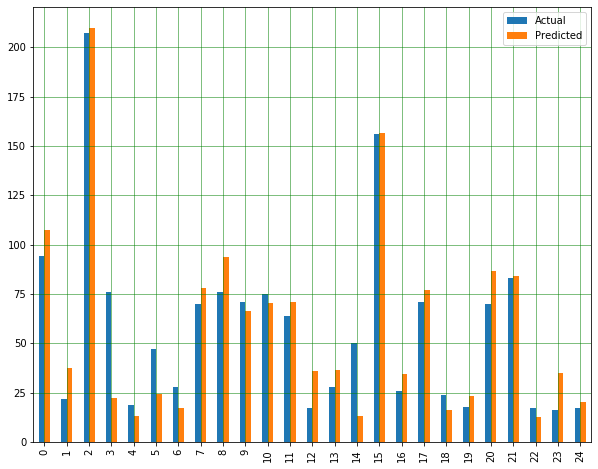

In [0]:
cdf.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14.516243036308945
Mean Squared Error: 398.23322312703607
Root Mean Squared Error: 19.95578169671727


In [0]:
from sklearn.tree import DecisionTreeRegressor
clf =  DecisionTreeRegressor(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

cdf = compare_df.head(25)
cdf

,Actual,Predicted
0,94.0,108.0
1,22.0,18.0
2,207.0,221.0
3,76.0,36.0
4,19.0,16.0
5,47.0,18.0
6,28.0,33.0
7,70.0,68.0
8,76.0,89.0
9,71.0,84.0


In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 16.46992836231669
Mean Squared Error: 573.0349925124456
Root Mean Squared Error: 23.938149312602377


In [0]:
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

cdf = compare_df.head(25)
cdf

,Actual,Predicted
0,94.0,99.612287
1,22.0,30.901496
2,207.0,211.288571
3,76.0,30.135344
4,19.0,29.641145
5,47.0,27.509430
6,28.0,27.960732
7,70.0,67.950458
8,76.0,87.935850
9,71.0,55.620360


In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.827537553359575
Mean Squared Error: 294.81680306010367
Root Mean Squared Error: 17.170230139986582


In [0]:
from sklearn.ensemble import ExtraTreesRegressor

clf = ExtraTreesRegressor(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

cdf = compare_df.head(25)
cdf

,Actual,Predicted
0,94.0,97.530
1,22.0,29.870
2,207.0,208.130
3,76.0,44.300
4,19.0,30.185
5,47.0,27.290
6,28.0,29.150
7,70.0,65.030
8,76.0,91.400
9,71.0,51.130


In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.673243280313352
Mean Squared Error: 277.73501788375023
Root Mean Squared Error: 16.66538382047501


# Pipelined 


In [0]:
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/pred.csv")

In [0]:
df.head()

,Unnamed: 0,predicted,windspeedKmph_A,DewPointC_A,cloudcover_A,precipMM_A,pressure_A,WindGustKmph_A,visibility_A,tempC_A,WindChillC_A,winddirDegree_A,humidity_A,date_A,airport_A,windspeedKmph_D,DewPointC_D,cloudcover_D,precipMM_D,pressure_D,WindGustKmph_D,visibility_D,tempC_D,WindChillC_D,winddirDegree_D,humidity_D,date_D,airport_D,Year,Quarter,Month,DayofMonth,Origin,Dest,CRSDepTime,DepDelayMinutes,DepDel15,ArrTime,ArrDelayMinutes,CRSArrTime
0,1,1.0,7.0,17.0,83.0,2.0,1019.0,13.0,9.0,21.0,21.0,155.0,80.0,72.0,9.0,10.0,6.0,100.0,0.7,1005.0,16.0,3.0,6.0,4.0,63.0,97.0,72.0,11.0,2016.0,1.0,3.0,13.0,11.0,9.0,2105.0,27.0,1.0,24.0,0.0,27.0
1,2,1.0,13.0,7.0,34.0,0.1,1008.0,19.0,10.0,28.0,28.0,140.0,29.0,233.0,2.0,19.0,13.0,0.0,0.0,1012.0,24.0,10.0,21.0,21.0,274.0,55.0,233.0,11.0,2016.0,3.0,8.0,21.0,11.0,2.0,1720.0,64.0,1.0,2357.0,0.0,1.0
2,5,1.0,5.0,23.0,67.0,0.0,1014.0,8.0,3.0,24.0,24.0,118.0,96.0,161.0,5.0,10.0,17.0,75.0,0.1,1012.0,11.0,10.0,20.0,19.0,210.0,85.0,161.0,8.0,2016.0,2.0,6.0,10.0,8.0,5.0,1855.0,15.0,1.0,122.0,22.0,100.0
3,13,1.0,12.0,22.0,0.0,0.0,1016.0,15.0,10.0,31.0,31.0,224.0,59.0,576.0,8.0,8.0,17.0,0.0,0.0,1017.0,10.0,10.0,28.0,28.0,246.0,52.0,576.0,14.0,2017.0,3.0,7.0,30.0,14.0,8.0,1145.0,35.0,1.0,717.0,0.0,728.0
4,16,1.0,14.0,15.0,79.0,0.1,1015.0,16.0,6.0,20.0,18.0,237.0,83.0,133.0,8.0,17.0,-2.0,0.0,0.0,1011.0,20.0,10.0,34.0,33.0,160.0,11.0,133.0,7.0,2016.0,2.0,5.0,13.0,7.0,8.0,1509.0,78.0,1.0,853.0,6.0,847.0


In [0]:
y = np.array(df['ArrDelayMinutes'])
df = df.drop(['Unnamed: 0','predicted','ArrTime','ArrDelayMinutes','CRSArrTime','DepDel15','date_A','date_D'],axis=1)
X = np.array(df)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

cdf = compare_df.head(25)
cdf

Mean Absolute Error: 17.175829107440872
Mean Squared Error: 1382.3236326512147
Root Mean Squared Error: 37.179613132081066


,Actual,Predicted
0,0.0,10.170108
1,0.0,9.890807
2,0.0,10.606166
3,0.0,12.359697
4,69.0,11.674782
5,0.0,11.859095
6,0.0,11.224565
7,0.0,10.741066
8,287.0,10.826672
9,5.0,10.606142


In [0]:
from sklearn.tree import DecisionTreeRegressor
clf =  DecisionTreeRegressor(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

cdf = compare_df.head(25)
cdf

Mean Absolute Error: 22.963771043771043
Mean Squared Error: 3646.5074747474746
Root Mean Squared Error: 60.38631860568646


,Actual,Predicted
0,0.0,0.0
1,0.0,2.0
2,0.0,0.0
3,0.0,0.0
4,69.0,3.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,287.0,0.0
9,5.0,0.0


In [0]:
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

cdf = compare_df.head(25)
cdf

Mean Absolute Error: 17.236862215280937
Mean Squared Error: 1395.3420344760334
Root Mean Squared Error: 37.35427732504048


,Actual,Predicted
0,0.0,9.008662
1,0.0,9.043315
2,0.0,11.308239
3,0.0,11.460180
4,69.0,11.934842
5,0.0,11.771702
6,0.0,10.936076
7,0.0,10.950635
8,287.0,12.034640
9,5.0,10.020105


In [0]:
from sklearn.ensemble import ExtraTreesRegressor

clf = ExtraTreesRegressor(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

cdf = compare_df.head(25)
cdf

Mean Absolute Error: 19.898451515151514
Mean Squared Error: 1593.7707907154884
Root Mean Squared Error: 39.92205894885043


,Actual,Predicted
0,0.0,21.55
1,0.0,21.53
2,0.0,10.55
3,0.0,6.87
4,69.0,8.16
5,0.0,15.06
6,0.0,18.02
7,0.0,9.51
8,287.0,10.04
9,5.0,2.52
